In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [3]:
def Model1_simulation(q1, q2, lambda_1, lambda_2, lambda_3, gamma_1, gamma_2, gamma_3, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    

    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_1 = 0
    Matches_EE = 0 
    Matches_Job = 0 
    
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_Job = 0 
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_Job = 0 
    
    
    
    # Initalise vector to store the time 
    Time_v = []
    
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*4)
    if(lambda_1 > 0):
        EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    else:
        EC[0] = TERM+1
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        #print(EC)
        iteration +=1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        

        # Next event is arrival of a CE
        if(ENEXT==0):
           # print('CE arrival')
            
            # Increase CE arrivals by 1 
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):
                
                
                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        #print('CE matches with job')
                        # CE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE and job matches by 1
                        Matches_CE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                
                        break
                
            # If there are no matches found or possible then CE joins the queue 
            if(m == 0):
              #  print('No match join queue')
                # update EC to inlude abandonment time of that CE 
                EC=np.insert(EC, (4+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_1)))
                
                # Joins queue 
                Q1 += 1
                
                
                
            # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        
        
        # Next event is arrival of a EE
        elif(ENEXT==1):
           # print('EE arrival')
            
            # Increase EE arrivals by 1 
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):

                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                       # print('EE matches with job')
                        # EE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and job matches by 1
                        Matches_EE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                        break
                
            # If there are no matches found or possible then EE joins the queue 
            if(m == 0):
              #  print('No match join queue ')
                # update EC to inlude abandonment time of that EE 
                EC=np.insert(EC, (4+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_2)))
    
                
                # Joins queue 
                Q2 += 1
                
            
                
                
            # Update EC to include next arrival time of EE
            EC[1]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_2)
            
        # Next event is arrival of job 
        elif(ENEXT == 2):
          #  print('Job arrival')
            
            # Initialise matches to be 0 
            m = 0 
            
            # Increase arrivals by 1
            Arrivals_Job += 1
            
            # CE > EE so first check if there are matches with CE
            if(Q1 > 0):
                
                # Loop through each CE and check for a match
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-r (probability of matching) then a match is found
                    if(u < (1-r1)):
                        
                        # Job Matches and leaves the system with the CE
                       # print('Job Matches with CE')
                        m += 1 
                        Q1 -= 1
                        
                        # Increase matches of job and CE by 1 
                        Matches_Job += 1
                        Matches_CE += 1 
                        
                        # Update event calender to remove abandonment time of the CE 
                        EC = np.delete(EC, (4+i))
                        break 
                        
            # If job didnt match with CE and there are EEs check for match
            if(Q2 > 0 and m == 0):
                
                # Loop through each EE and check for a match 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-2 (probability of matching) then a match is found
                    if(u < (1-r2)):
                      #  print('Job matches with EE')
                        # Job Matches and leaves the system with the EE
                        
                        m += 1 
                        Q2 -= 1
                        
                        # Increase matches of job and EE by 1 
                        Matches_Job += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the EE 
                        EC = np.delete(EC, (4+Q1+i))
                        break
            # If no CE or EE to match or no match found, then job joins the job queue  
            if(m == 0):
             #   print('No match join queue')
                # Update EC to include abandonment time of the job
                EC = np.insert(EC, (4+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_3)))
                # Job joinss job queue 
                Q3 += 1 
                
            # Update event calander to include next arrival of job 
            EC[2]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is abandonment of CE
        elif((ENEXT>3) and (ENEXT<=(3+Q1))):
          #  print('CE abandonment')
            # Q1 decreases by 1 
            Q1 -= 1
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        # If next event is an abandonment of EE (Q2)
        elif((ENEXT>(3+Q1)) and (ENEXT<=(3+Q1+Q2))):
          #   print('EE abandonment')
            # Q2 decreases by 1 
             Q2 -= 1
            # Abandonment Increases by 1
             Abandonment_EE += 1
            # Remove abandonment time from event calendar 
             EC = np.delete(EC, ENEXT)
            #print('Q2 abandonment')
            #print(EC)
        
        # Next event is abandonment of Job (Q3)
        elif((ENEXT>(3+Q1+Q2)) and (ENEXT<=(3+Q1+Q2+Q3))):
            # Q3 decreases by 1
            Q3 -= 1
             # Abandonment increases by 1
            Abandonment_Job += 1
             # Remove abandonment time from event calendar
            EC = np.delete(EC, ENEXT)
             
        
             
    T_Q = AQ1+AQ2+AQ3  
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_Job > 0):
        JobMatchRate = Matches_Job/Arrivals_Job
        JobAbandonRate = Abandonment_Job/Arrivals_Job
    else:
        JobMatchRate = 0
        JobAbandonRate = 0 
    if(Arrivals_CE +Arrivals_EE+Arrivals_Job > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    
    
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_Total= T_Q/TERM
    

    
    return Av_AQ1, Av_AQ2, Av_AQ3, CEMatchRate, EEMatchRate, JobMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JobAbandonRate, TotalAbandonRate , Av_Total



             
             

        
        
                
                        
            
                
                
        

In [4]:
print(datetime. now())
q1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

CE_Match_rates = []
EE_Match_rates = []
Job_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
Job_Abandon_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
Job_Queue_length = []
Total_Queue_length = []



for i in range(len(q1)):
    print(q1[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    Job_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    Job_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    Job_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(10):
        print(j)
        print(datetime. now())
        rep_results=Job_sim(q1[i], 0.5, 1, 1, 1, 0.1, 0.1, 0.1, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[3])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[4])
        Job_Rep_m_rate = np.append(Job_Rep_m_rate, rep_results[5])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[6])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[7])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[8])
        Job_Rep_a_rate = np.append(Job_Rep_a_rate, rep_results[9])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[10])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        Job_Rep_q_length = np.append(Job_Rep_q_length, rep_results[2])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[11])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    Job_Match_rates = np.append(Job_Match_rates, np.average(Job_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    Job_Abandon_rates = np.append(Job_Abandon_rates, np.average(Job_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    Job_Queue_length = np.append(Job_Queue_length, np.average(Job_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(Job_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(Job_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(Job_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-06 09:55:35.283614
0
0
0
2023-08-06 09:55:35.284504
1
2023-08-06 09:55:51.587921
2
2023-08-06 09:56:07.772878
3
2023-08-06 09:56:24.547988
4
2023-08-06 09:56:41.142424
5
2023-08-06 09:56:56.171823
6
2023-08-06 09:57:09.812600
7
2023-08-06 09:57:23.895077
8
2023-08-06 09:57:37.799252
9
2023-08-06 09:57:51.033854
[0.]
[0.84502101]
[0.84653801]
[0.56346807]
[0.99968718]
[0.15495905]
[0.15338518]
[0.43639532]
[10.02368482]
[1.54481857]
[1.52942598]
[13.09792937]
0.1
1
0
2023-08-06 09:58:08.616476
1
2023-08-06 09:58:02.742529
2
2023-08-06 09:58:15.481254
3
2023-08-06 09:58:28.205142
4
2023-08-06 09:58:41.293875
5
2023-08-06 09:58:56.536875
6
2023-08-06 09:59:09.275383
7
2023-08-06 09:59:22.135455
8
2023-08-06 09:59:37.431062
9
2023-08-06 09:59:50.275233
[0.         0.44163606]
[0.84502101 0.54048823]
[0.84653801 0.98283996]
[0.56346807 0.65483676]
[0.99968718 0.55823722]
[0.15495905 0.45938498]
[0.15338518 0.01714666]
[0.43639532 0.34507421]
[10.02368482  5.5949919 ]
[1.54481857 4.5

1
2023-08-06 10:13:51.843865
2
2023-08-06 10:14:03.002111
3
2023-08-06 10:14:14.775053
4
2023-08-06 10:14:25.995724
5
2023-08-06 10:14:37.266966
6
2023-08-06 10:14:48.416962
7
2023-08-06 10:15:00.539904
8
2023-08-06 10:15:11.820234
9
2023-08-06 10:15:22.652217
[0.         0.44163606 0.5748983  0.64444056 0.68728423 0.7162619
 0.73421891 0.74979749 0.7590098  0.76580602]
[0.84502101 0.54048823 0.41712766 0.35159089 0.31031327 0.28256679
 0.26218315 0.25124856 0.23996761 0.23438057]
[0.84653801 0.98283996 0.99273401 0.99532244 0.99662441 0.99732947
 0.99757037 0.99781789 0.99830909 0.99827181]
[0.56346807 0.65483676 0.66151594 0.66401687 0.66458342 0.66510969
 0.66430861 0.66663174 0.6661624  0.6662705 ]
[0.99968718 0.55823722 0.42494568 0.35542285 0.31260596 0.28364773
 0.26567127 0.25009552 0.24088035 0.23414065]
[0.15495905 0.45938498 0.58267287 0.64814521 0.68946351 0.71718712
 0.73760069 0.74846069 0.75977242 0.76536592]
[0.15338518 0.01714666 0.00726599 0.00467424 0.00337224 0.0026

In [3]:
# Results 

q1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
CE_Match_rates = [0.0, 0.44163606, 0.5748983, 0.64444056, 0.68728423, 0.7162619, 0.73421891, 0.74979749, 0.7590098, 0.76580602, 0.77111515]
EE_Match_rates = [0.84502101, 0.54048823, 0.41712766, 0.35159089, 0.31031327, 0.28256679, 0.26218315, 0.25124856, 0.23996761, 0.23438057, 0.22393026]
Job_Match_rates = [0.84653801, 0.98283996, 0.99273401, 0.99532244, 0.99662441, 0.99732947, 0.99757037, 0.99781789, 0.99830909, 0.99827181, 0.9983161]
Total_Match_rates = [0.56346807, 0.65483676, 0.66151594, 0.66401687, 0.66458342, 0.66510969, 0.66430861, 0.66663174, 0.6661624, 0.6662705, 0.66424856]
CE_Abandon_rates = [0.99968718, 0.55823722, 0.42494568, 0.35542285, 0.31260596, 0.28364773, 0.26567127, 0.25009552, 0.24088035, 0.23414065, 0.22882498]
EE_Abandon_rates = [0.15495905, 0.45938498, 0.58267287, 0.64814521, 0.68946351, 0.71718712, 0.73760069, 0.74846069, 0.75977242, 0.76536592, 0.77576937]
Job_Abandon_rates = [0.15338518, 0.01714666, 0.00726599, 0.00467424, 0.00337224, 0.00267053, 0.00242963, 0.00218211, 0.00169091, 0.00172819, 0.0016839]
Total_Abandon_rates = [0.43639532, 0.34507421, 0.33836545, 0.33584864, 0.3353044, 0.33477806, 0.3355825, 0.33323589, 0.33371427, 0.33362724, 0.33563135]
CE_Queue_length = [10.02368482, 5.5949919, 4.23739396, 3.55509502, 3.11633379, 2.83994093, 2.66974097, 2.49563071, 2.40688708, 2.33183688, 2.28021055]
EE_Queue_length = [1.54481857, 4.58716994, 5.83998757, 6.4779399, 6.92782366, 7.17563773, 7.38679363, 7.4435484, 7.6132184, 7.6434948, 7.72790945]
Job_Queue_length = [1.52942598, 0.17272215, 0.0732461, 0.04566434, 0.03365867, 0.02724147, 0.02343448, 0.02353819, 0.01880632, 0.01768, 0.01744527]
Total_Queue_length = [13.09792937, 10.354884, 10.15062762, 10.07869925, 10.07781612, 10.04282013, 10.07996908, 9.96271731, 10.03891181, 9.99301168, 10.02556527]


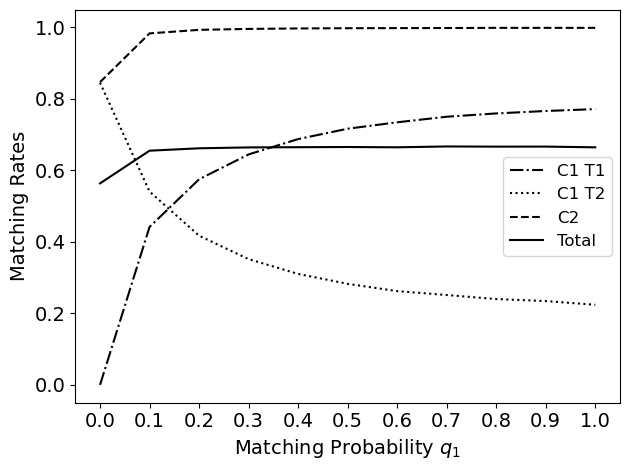

In [17]:
plt.xlabel(r'Matching Probability $q_1$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(q1, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(q1, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(q1, Job_Match_rates,  linestyle='dashed', label = 'C2', color='black')
plt.plot(q1, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(q1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp1_Match.png')
plt.show()

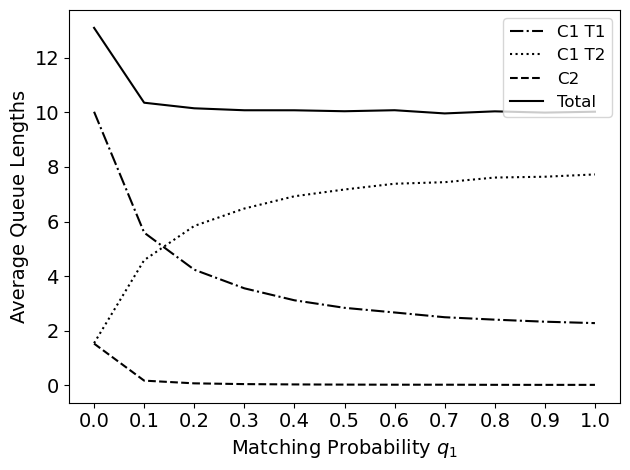

In [18]:
plt.xlabel(r'Matching Probability $q_1$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(q1, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(q1, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(q1, Job_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(q1, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(q1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp1_Queue.png')
plt.show()



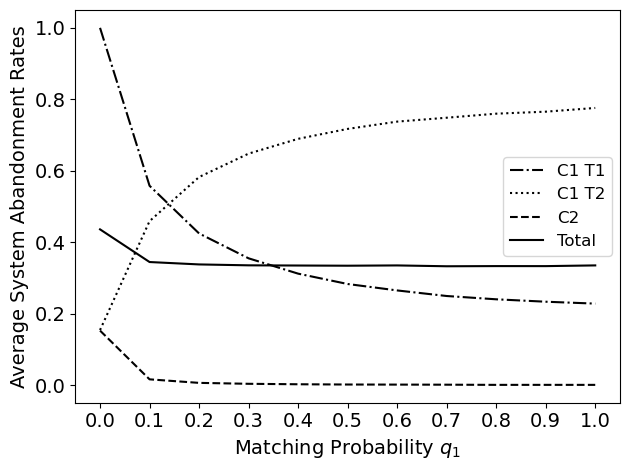

In [19]:
plt.xlabel(r'Matching Probability $q_1$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(q1, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(q1, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(q1, Job_Abandon_rates, linestyle='dashed', label = 'C2', color='black')
plt.plot(q1, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(q1, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp1_Abandon.png')
plt.show()


